In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = pd.read_csv('weather_data.csv')
data["Date"] = pd.to_datetime(data["Date"])
data["Difference_in_days"] = (data["Date"] - data["Date"].min()).dt.days
data["Month"] = data["Date"].dt.month
mounthly_data = data.groupby("Month").mean().reset_index()

Задания 1.1 и 1.2:

Text(0.5, 1.0, 'Temperature Over Time')

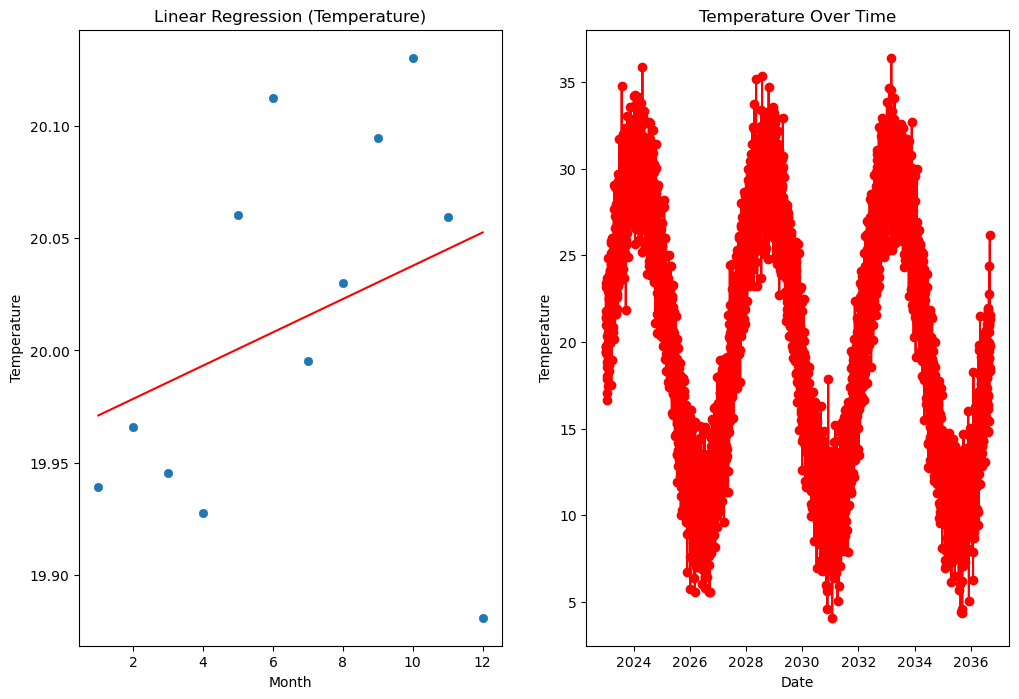

In [6]:
#X = data["Difference_in_days"].values.reshape(-1,1)
X = mounthly_data["Month"].values.reshape(-1, 1)
Y = mounthly_data["Temperature"].values
Z = mounthly_data["Humidity"].values

temp_model = LinearRegression()
humidity_model = LinearRegression()

temp_model.fit(X, Y)
humidity_model.fit(X, Z)

Y_pred = temp_model.predict(X)
Z_pred = humidity_model.predict(X)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, linewidths=0.5)
plt.plot(X, Y_pred, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Linear Regression (Temperature)')

plt.subplot(1, 2, 2)
plt.plot(data["Date"], data["Temperature"], linestyle='-', marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')


Задание 1.3

Text(0.5, 1.0, 'Polynomial Regression (Temperature)')

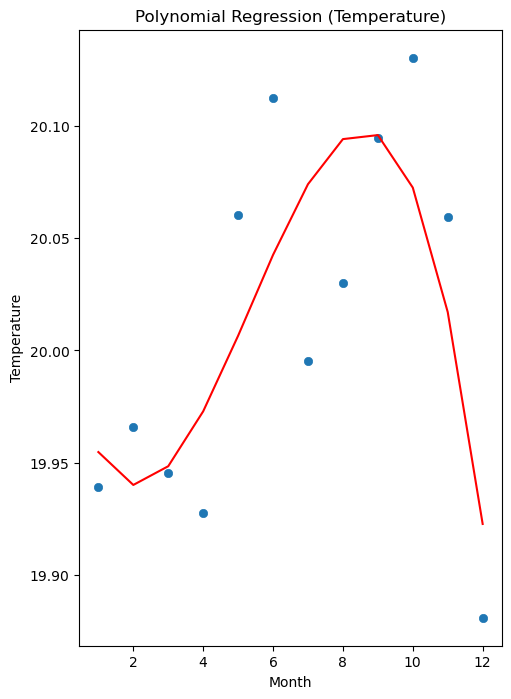

In [7]:
poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X)

temp_model_poly = LinearRegression()
humidity_model_poly = LinearRegression()

temp_model_poly.fit(X_poly, Y)
humidity_model_poly.fit(X_poly, Z)

Y_pred_poly = temp_model_poly.predict(X_poly)
Z_pred_poly = humidity_model_poly.predict(X_poly)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, linewidths=0.5)
plt.plot(X, Y_pred_poly, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Polynomial Regression (Temperature)')